## Ejercicio attrition

1. Carga el dataset [attrition de `kaggle`](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download) (Hay que loguearse en kaggle y descargar el csv)
   1. Clasificacion de si el empleado deja o no la empresa (el target es la columna Attrition).
   2. Usaremos TODAS las columnas disponibles del dataset. No hace falta volverse loco con el feature engineering, pero es posible que alguna cosa haya que hacer para poder meter todas las columnas. 
   
2. Prueba todos los métodos de clasificación vistos hasta ahora mediante GridSearchCV (logistic regression, SVM, al menos un metodo de boosting, random forest y MLP). Obligatorio usarlos todos por separado usando pipelines. Se puede hacer todo en sklearn.
   1. Hay que reportar la performance de los modelos con al menos: Accuracy, precission, recall, F1-Score y AUC-ROC
   2. IMPORTANTE: Comentar cual es el mejor metodo y cual es la mejor metrica para este caso de uso concreto.
   
3. Utiliza uno de los métodos para sacar la importancia de las variables del modelo escogido.
   **¿Qué es?**
   Serie de técnicas que asignan puntuaciones a las variables independientes de un modelo predictivo en función de su importancia relativa al realizar una predicción sobre la variable dependiente o target. 
   IMPORTANTE: Antes de obtener el feature importance siempre hay que evaluar la capacidad predictiva del modelo implementado.
   **Tipos**
   1. Métodos "built in" en modelos intrinsecamente intepretables (ya vistos al estudiar los modelos lineales y los modelos basados en árboles de decision). 
   2. Permutation importance
   3. Drop columns importance
   
4. Utilizar un ultimo metodo que sea un stacking (ensemble) de al menos 4 de los metodos anteriores. Obtener las metricas anteriores (acc, prec, recall, etc..)
   
5. Valoracion y comentarios de los resultados obtenidos al final. 

In [150]:
import pandas as pd

In [151]:
df = pd.read_csv("data.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<Axes: xlabel='Attrition'>

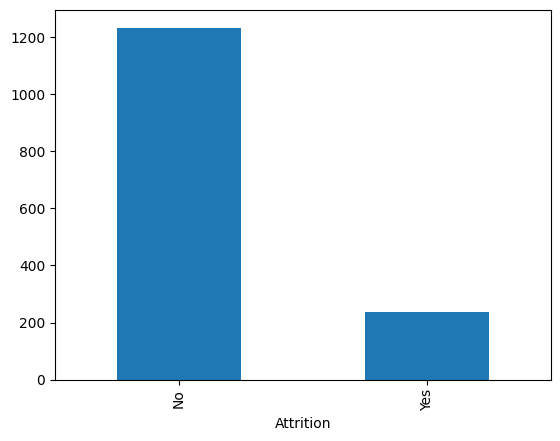

In [152]:
df["Attrition"].value_counts().plot(kind="bar")

In [153]:
df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

In [154]:
predictions = [0]*len(df)

In [155]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [156]:
f1_score(df["Attrition"], predictions)


0.0

In [157]:
# df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

In [158]:
accuracy_score(df["Attrition"], predictions)
f1_score(df["Attrition"], predictions)


0.0

In [159]:
confusion_matrix(df["Attrition"], predictions)

array([[1233,    0],
       [ 237,    0]], dtype=int64)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [161]:
df = df.drop(["EmployeeCount", "EmployeeNumber", "StandardHours"], axis=1)

In [162]:
df.loc[:, df.dtypes!=object]

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


In [163]:
df.loc[:, df.dtypes!=object].loc[:, "StandardHours"].value_counts()

KeyError: 'StandardHours'

In [164]:
df.loc[:, df.dtypes==object]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [165]:
X = df.loc[:, df.dtypes!=object].drop(["Attrition"], axis=1)
y = df["Attrition"]


In [166]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [167]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [171]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [172]:
# # FIT
# MEANS = []
# STDS = []
# for col in X_train.columns:
#     MEANS.append(X_train[col].mean())
#     STDS.append(X_train[col].std())
    
# # TRANSFORM
# for index, col in enumerate(X_train.columns):
#     X_train[col] = (X_train[col]-MEANS[index])/STDS[index]

# for index, col in enumerate(X_test.columns):
#     X_test[col] = (X_test[col]-MEANS[index])/STDS[index]

In [173]:
rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)

cross_val_score(rf, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.5433964027229096

In [174]:
df.loc[:, df.dtypes==object].iloc[:, 0].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [175]:
df["BusinessTravel"] = df.loc[:, df.dtypes==object].iloc[:, 0].map({"Non-Travel":0, "Travel_Rarely":1, "Travel_Frequently": 2})

In [176]:
X = df.loc[:, df.dtypes!=object].drop(["Attrition"], axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)
cross_val_score(rf, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.5581155541024285

In [177]:
df = pd.concat([df, pd.get_dummies(df.loc[:, df.dtypes==object].iloc[:, 0]).astype(int)], axis=1).drop("Department", axis=1)

In [190]:
X = df.loc[:, df.dtypes!=object].drop(["Attrition"], axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)
cross_val_score(rf, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.5855356842950139

In [203]:
X = df.loc[:, df.dtypes!=object].drop(["Attrition"], axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(X_train)
X_train = pca.transform(X_train)
# X_test = scaler.transform(X_test)


rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)
cross_val_score(rf, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.549508958406161

In [199]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.17348762, 0.24650854, 0.31376546, 0.37875642, 0.42389887,
       0.46592467, 0.5068238 , 0.54708597, 0.58693843, 0.62549999,
       0.66358262, 0.70086043, 0.73611197, 0.77077384, 0.80409691,
       0.83704462, 0.86913184, 0.90051937, 0.92771896, 0.94808467,
       0.96658682, 0.9770725 , 0.98569157, 0.99323888, 0.99831786,
       1.        , 1.        ])

COLUMNA EDUCATION 

In [ ]:
# df.loc[:, df.dtypes==object].iloc[:, 0].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [179]:
rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)
cross_val_score(rf, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.5855356842950139

In [180]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, n_jobs=-1)

cross_val_score(xgb, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.6282304141796979

In [181]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42, n_jobs=-1)

cross_val_score(lgb, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.6167901496855208

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

cross_val_score(gbc, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.6420907553897583

In [183]:
GradientBoostingClassifier??

Init signature:
GradientBoostingClassifier(
    *,
    loss='log_loss',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Source:        
class GradientBoostingClassifier(ClassifierMixin, BaseGradientBoosting):
    """Gradient Boosting for classification.

    This algorithm builds an additive model in a forward stage-wise fashion; it
    allows for the optimization of arbitrary differentiable loss functions. In
    each stage ``n_classes_`` regression trees are fit on the negative gradient
    of the loss function, e.g. binary or multiclass log loss. Binary
    classification is a special case where o

In [184]:
from sklearn.model_selection import GridSearchCV
gbc = GradientBoostingClassifier(random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7],
    # 'min_samples_split': [2, 5, 10],
    'subsample': [0.5, 0.75, 1.0]
}

grid = GridSearchCV(
            estimator=gbc,
            param_grid=param_grid,
            n_jobs=-1,
            cv=5,
            scoring="f1_macro"

)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200, 500],
                         'subsample': [0.5, 0.75, 1.0]},
             scoring='f1_macro')

In [185]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.75}

In [187]:
final_model = GradientBoostingClassifier(random_state=42, **grid.best_params_)

final_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42, subsample=0.75)

In [191]:
predictions = final_model.predict(X_test)

In [192]:
confusion_matrix(y_test, predictions)

array([[305,  15],
       [ 37,  11]], dtype=int64)

In [ ]:
# df = pd.concat([df, pd.get_dummies(df.loc[:, df.dtypes==object].iloc[:, 0]).astype(int)], axis=1).drop("EducationField", axis=1)

In [148]:
X = df.loc[:, df.dtypes!=object].drop(["Attrition"], axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)
cross_val_score(rf, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.5636633792082426

In [99]:
df = pd.concat([df, pd.get_dummies(df.loc[:, df.dtypes==object].iloc[:, 0]).astype(int)], axis=1)

In [ ]:
df.loc[:, df.dtypes==object].iloc[:, 6].value_counts()

IndexError: single positional indexer is out-of-bounds

0.5549059694643612 # random fores baseline con cols solo numericas
0.5692743445129704 # RF + col BusinessTravel (SE QUEDA)
0.5706251313240297 # rf + col department ONE HOT (SE QUEDA)


In [116]:
rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)

cross_val_score(rf, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.5706251313240297

In [117]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, n_jobs=-1)

cross_val_score(xgb, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.6282304141796979

In [118]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42, n_jobs=-1)

cross_val_score(lgb, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.6167901496855208

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

cross_val_score(gbc, X_train, y_train, cv=5, scoring="f1_macro", n_jobs=-1).mean()

0.6420907553897583

In [122]:
GradientBoostingClassifier??

Init signature:
GradientBoostingClassifier(
    *,
    loss='log_loss',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Source:        
class GradientBoostingClassifier(ClassifierMixin, BaseGradientBoosting):
    """Gradient Boosting for classification.

    This algorithm builds an additive model in a forward stage-wise fashion; it
    allows for the optimization of arbitrary differentiable loss functions. In
    each stage ``n_classes_`` regression trees are fit on the negative gradient
    of the loss function, e.g. binary or multiclass log loss. Binary
    classification is a special case where o

In [ ]:
params = {
    "n_estimators": [100, 200, 500, 1000],
    "learning_rate": [0.05, 0.1, 0.2, 0.5],
    "max_depth": [None, 3, 5, 7]

}
gbc = GradientBoostingClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
                gbc, 
                param_grid=params,
                cv=5,
                n_jobs=-1,
                scoring="f1_macro")

grid.fit(X_train, y_train)

TypeError: GradientBoostingClassifier.__init__() got an unexpected keyword argument 'class_weight'

In [124]:
grid.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 500}

In [126]:
gbc = GradientBoostingClassifier(random_state=42, **grid.best_params_)

In [127]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=500, random_state=42)

In [128]:
predictions = gbc.predict(X_test)

In [129]:
accuracy_score(y_test, predictions)

0.8478260869565217

In [130]:
f1_score(y_test, predictions)

0.3170731707317073

In [204]:
f1_score(y_test, predictions)

0.2972972972972973